In [198]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn settings
sns.set_theme()
sns.set_context("poster", font_scale=1.4)

from mcmc import metropolis_hastings

%matplotlib inline

In [199]:
def gaussian_proposal(x, sigma):
    
#     x_cand = [np.random.normal(x[0], sigma), np.random.lognormal(x[1], sigma)]
    
#     return np.array(x_cand)

    return np.random.normal(x, sigma, x.shape)

def log_prior(x):
    #x[0] = mu, x[1]=sigma (new or current)
    #returns 1 for all valid values of sigma. Log(1) =0, so it does not affect the summation.
    #returns 0 for all invalid values of sigma (<=0). Log(0)=-infinity, and Log(negative number) is undefined.
    #It makes the new sigma infinitely unlikely.
#     if(x[1] <=0):
#         return 0
#     return 1
    prior_b = -np.log(0.5 * np.sqrt(2*np.pi)) - (x[0]**2) / (2*0.5**2)
    prior_s = np.log(1 / 30)
    return prior_b + prior_s
    

def log_likelihood(x, data):
    #x[0]=mu, x[1]=sigma (new or current)
    #data = the observation
    return np.sum(-np.log(x[1] * np.sqrt(2* np.pi))-((data-x[0])**2) / (2*x[1]**2))

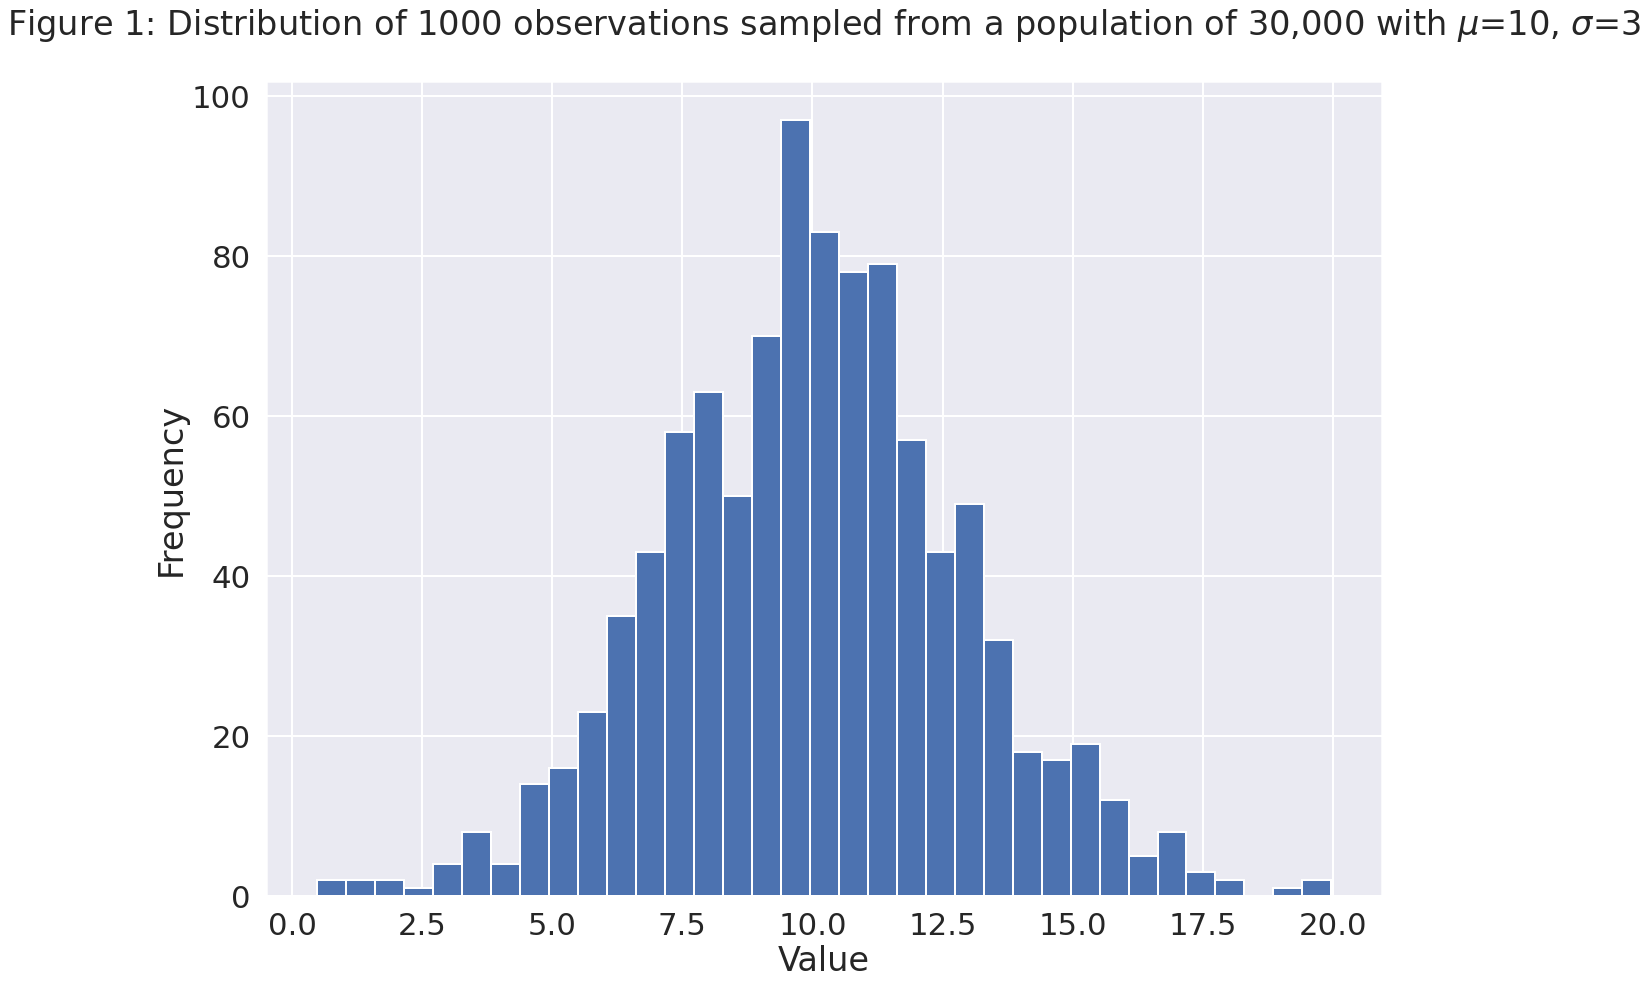

In [200]:
# Form a population of 30,000 individual, with average=10 and scale=3
population = np.random.normal(10,3,30000)
# Assume we are only able to observe 1,000 of these individuals.
observation = population[np.random.randint(0, 30000, 1000)]

mu_obs=observation.mean()

fig, ax = plt.subplots(figsize=(20,15))
ax.hist(observation,bins=35)
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Figure 1: Distribution of 1000 observations sampled from a population of 30,000 with $\mu$=10, $\sigma$=3\n")
plt.show()

In [202]:
x_init = np.array([4, 0.1])
accepted, rejected = metropolis_hastings(x_init, gaussian_proposal, log_prior, log_likelihood, observation,
                                         proposal_kwargs={'sigma': 0.05}, samples=100000, burn_in=0.0)

<ipython-input-199-b49248fe7a6e>:25: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(x[1] * np.sqrt(2* np.pi))-((data-x[0])**2) / (2*x[1]**2))


In [203]:
accepted.shape

(68635, 2)

In [204]:
accepted[-10:, 0], accepted[-10:, 1]

(array([9.66362381, 9.65860482, 9.57327965, 9.59684464, 9.53449904,
        9.56865467, 9.57133571, 9.61653865, 9.59523379, 9.567677  ]),
 array([2.92993176, 2.91454343, 2.92818126, 2.88443446, 2.92777006,
        2.90682111, 2.9200465 , 2.91529678, 2.91485101, 2.92871953]))

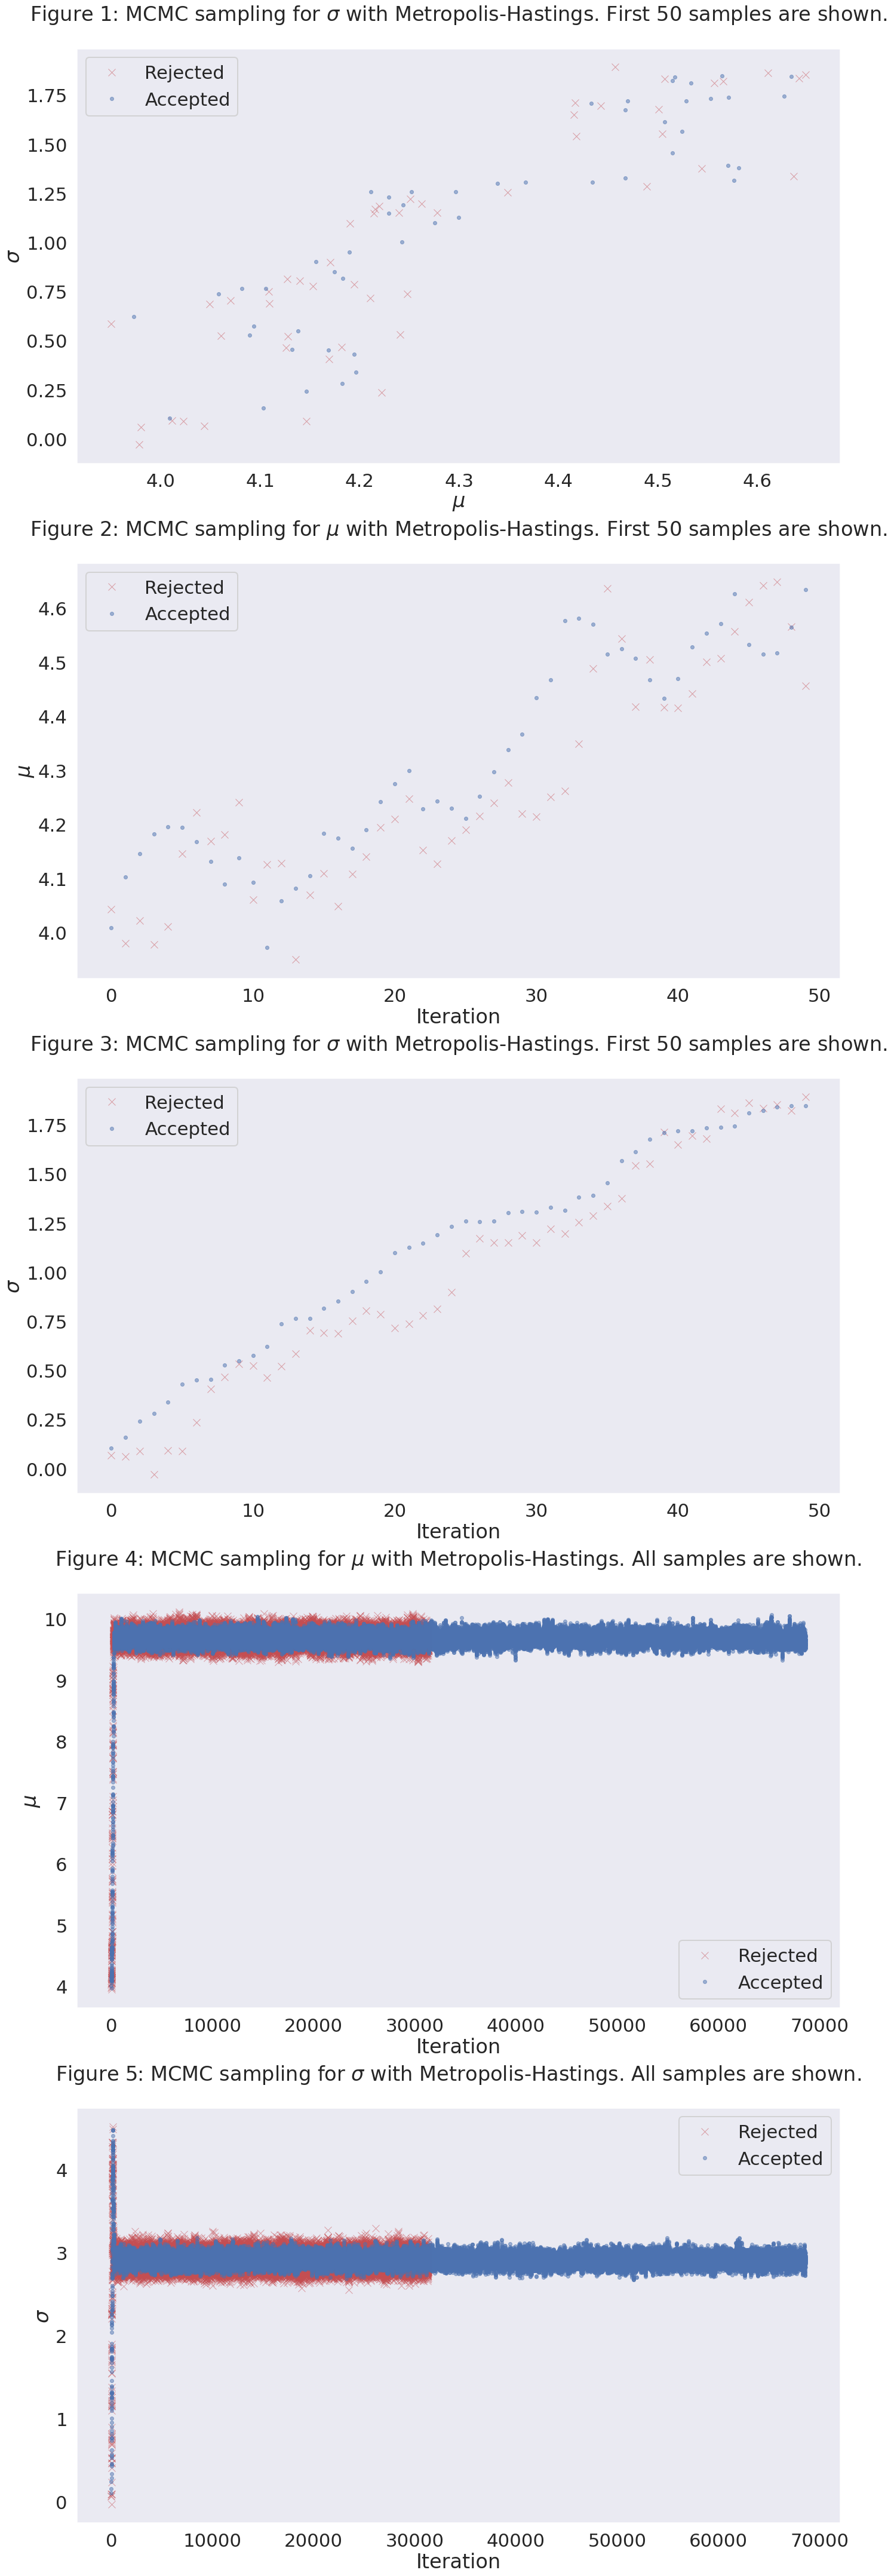

In [205]:
fig = plt.figure(figsize=(20,60))

ax0 = fig.add_subplot(5,1,1)
ax0.plot(rejected[0:50,0],rejected[0:50,1], 'rx', label='Rejected',alpha=0.5)
ax0.plot(accepted[0:50,0],accepted[0:50,1], 'b.', label='Accepted',alpha=0.5)
ax0.set_xlabel("$\mu$")
ax0.set_ylabel("$\sigma$")
ax0.set_title("Figure 1: MCMC sampling for $\sigma$ with Metropolis-Hastings. First 50 samples are shown.\n")
ax0.grid()
ax0.legend()

ax1 = fig.add_subplot(5,1,2)
ax1.plot(rejected[0:50,0], 'rx', label='Rejected',alpha=0.5)
ax1.plot(accepted[0:50,0], 'b.', label='Accepted',alpha=0.5)
ax1.set_xlabel("Iteration")
ax1.set_ylabel("$\mu$")
ax1.set_title("Figure 2: MCMC sampling for $\mu$ with Metropolis-Hastings. First 50 samples are shown.\n")
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(5,1,3)
ax2.plot( rejected[0:50,1], 'rx', label='Rejected',alpha=0.5)
ax2.plot( accepted[0:50,1], 'b.', label='Accepted',alpha=0.5)
ax2.set_xlabel("Iteration")
ax2.set_ylabel("$\sigma$")
ax2.set_title("Figure 3: MCMC sampling for $\sigma$ with Metropolis-Hastings. First 50 samples are shown.\n")
ax2.grid()
ax2.legend()

ax3 = fig.add_subplot(5,1,4)
to_show=-accepted.shape[0]
ax3.plot( rejected[to_show:,0], 'rx', label='Rejected',alpha=0.5)
ax3.plot( accepted[to_show:,0], 'b.', label='Accepted',alpha=0.5)
ax3.set_xlabel("Iteration")
ax3.set_ylabel("$\mu$")
ax3.set_title("Figure 4: MCMC sampling for $\mu$ with Metropolis-Hastings. All samples are shown.\n")
ax3.grid()
ax3.legend()

ax4 = fig.add_subplot(5,1,5)
to_show=-accepted.shape[0]
ax4.plot( rejected[to_show:,1], 'rx', label='Rejected',alpha=0.5)
ax4.plot( accepted[to_show:,1], 'b.', label='Accepted',alpha=0.5)
ax4.set_xlabel("Iteration")
ax4.set_ylabel("$\sigma$")
ax4.set_title("Figure 5: MCMC sampling for $\sigma$ with Metropolis-Hastings. All samples are shown.\n")
ax4.grid()
ax4.legend()

fig.tight_layout()
plt.show()

In [206]:
mu = np.mean(accepted[:,0])
sigma = np.mean(accepted[:,1])

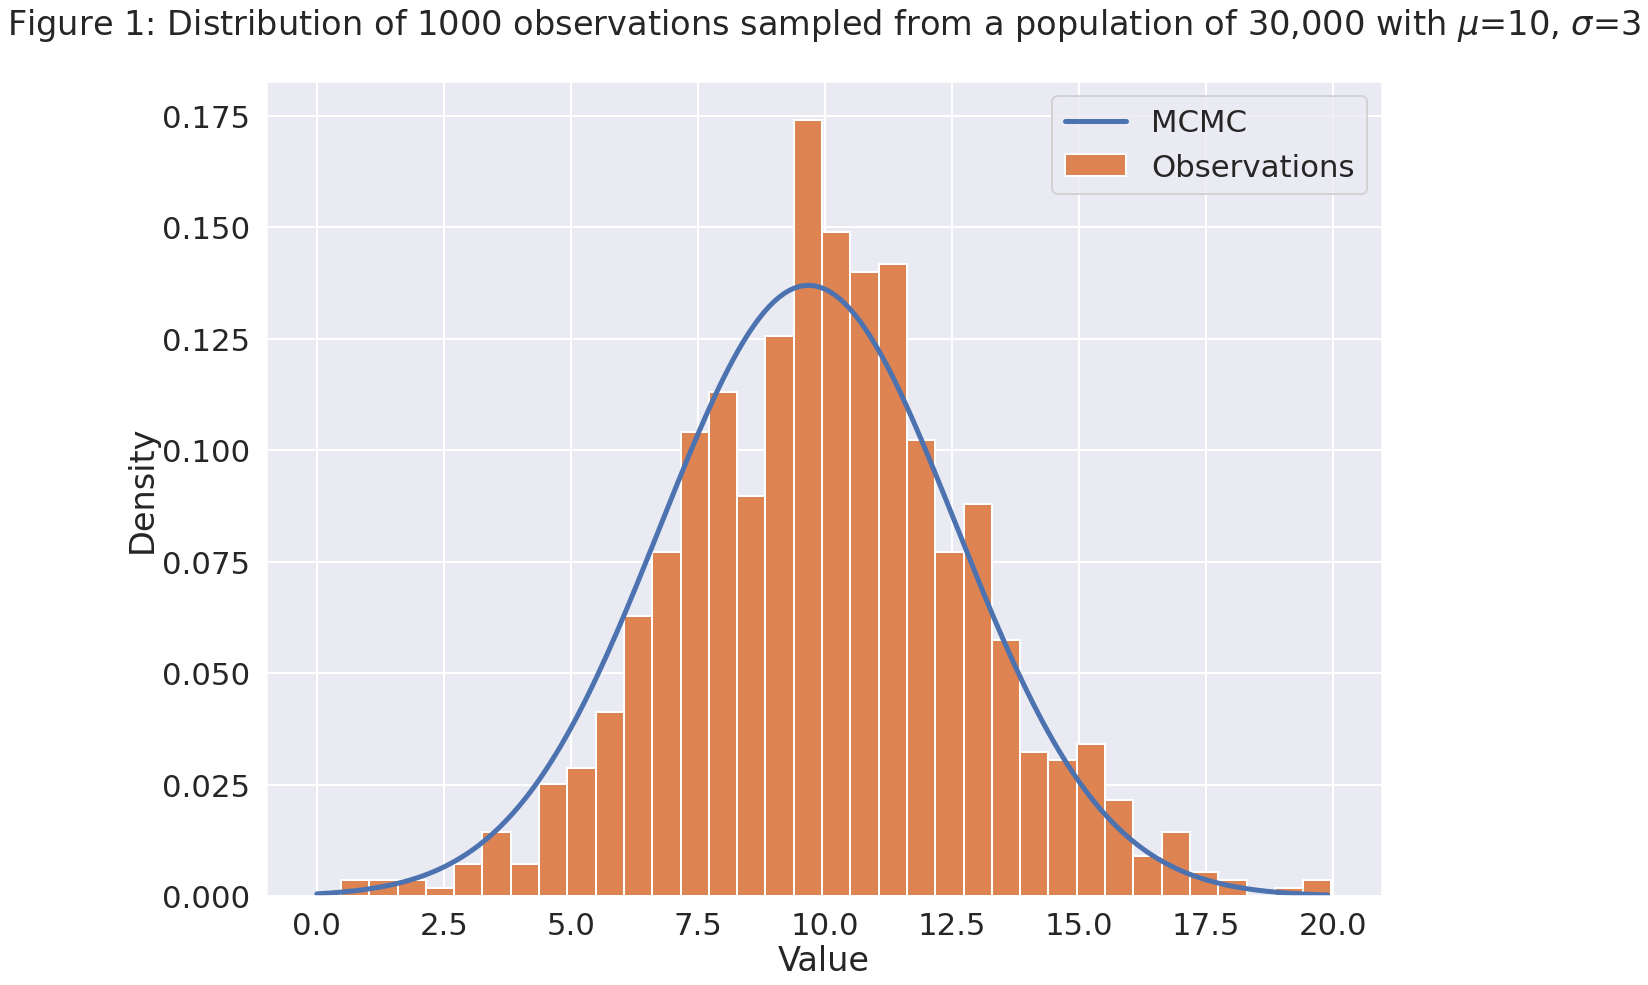

In [217]:
xs = np.arange(0, 20, 0.1)

fig, ax = plt.subplots(figsize=(20,15))
ax.plot(xs, norm.pdf(xs, mu, sigma), lw=5, label='MCMC')
ax.hist(observation, bins=35, density=True, label='Observations')
ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.set_title("Figure 1: Distribution of 1000 observations sampled from a population of 30,000 with $\mu$=10, $\sigma$=3\n")
ax.legend()
plt.show()